In [1]:
import numpy as np

In [20]:
a = np.array([1, 2, 3])
b = np.array([3, 1, 4])
c = np.array([5, 6, 5])

v = np.array([a, b, c])

v.min(axis=0)

array([1, 1, 3])

In [21]:
v.max(axis=0)

array([5, 6, 5])

In [22]:
v

array([[1, 2, 3],
       [3, 1, 4],
       [5, 6, 5]])

In [23]:
v[v[:,1].argsort()]

array([[3, 1, 4],
       [1, 2, 3],
       [5, 6, 5]])

In [24]:
v

array([[1, 2, 3],
       [3, 1, 4],
       [5, 6, 5]])

## Barycentric coordinates

In [25]:
T1 = ([a, b] - c)[:, :2]
T1

array([[-4, -4],
       [-2, -5]])

In [26]:
#  ax - cx    bx - cx
#  ay - cy    by - cy
T = (v[:-1,:2] - v[-1, :2]).T
T

array([[-4, -2],
       [-4, -5]])

In [27]:
T_inv = np.linalg.inv(T)

In [28]:
p = np.array([3, 2, 3])

In [29]:
T_inv

array([[-0.41666667,  0.16666667],
       [ 0.33333333, -0.33333333]])

In [58]:
d = (p[:2] - v[-1, :2])
d

array([-4, -4])

In [69]:
bc = np.dot(T_inv, d)

In [71]:
bc.resize(3)
bc[-1] = 1 - bc.sum()
bc

array([  1.00000000e+00,   0.00000000e+00,   1.11022302e-16])

In [81]:
bc >= 0

array([ True,  True,  True], dtype=bool)

In [84]:
bc <= 1

array([ True,  True,  True], dtype=bool)

In [90]:
np.less_equal(bc, 1)

array([ True,  True,  True], dtype=bool)

In [93]:
np.logical_and( bc >= 0 , bc <= 1).all()

True

In [79]:
if (bc > 0 and bc < 1).all():
    print(False)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Vectoriced triangle rendering

In [150]:
T = (v[:-1, :2] - v[-1, :2]).T
print("T = ", T)
T_inv = np.linalg.inv(T)
print("T_inv = ", T_inv)

('T = ', array([[-4, -2],
       [-4, -5]]))
('T_inv = ', array([[-0.41666667,  0.16666667],
       [ 0.33333333, -0.33333333]]))


In [100]:
nx, ny = 3, 2

In [125]:
x = np.arange(3, 7)
x

array([3, 4, 5, 6])

In [126]:
y = np.arange(5, 8)
y

array([5, 6, 7])

In [173]:
u, v = np.meshgrid(x, y, sparse=False)
print(u)
print(v)

[[3 4 5 6]
 [3 4 5 6]
 [3 4 5 6]]
[[5 5 5 5]
 [6 6 6 6]
 [7 7 7 7]]


In [179]:
uv = np.array([u, v])
print(uv)
print(uv.shape)

[[[3 4 5 6]
  [3 4 5 6]
  [3 4 5 6]]

 [[5 5 5 5]
  [6 6 6 6]
  [7 7 7 7]]]
(2L, 3L, 4L)


In [180]:
uv = uv.transpose(1, 2, 0)
print(uv)
uv.shape

[[[3 5]
  [4 5]
  [5 5]
  [6 5]]

 [[3 6]
  [4 6]
  [5 6]
  [6 6]]

 [[3 7]
  [4 7]
  [5 7]
  [6 7]]]


(3L, 4L, 2L)

In [214]:
bcd = uv - np.array([2, 3])
print(bcd)
bcd.shape

[[[1 2]
  [2 2]
  [3 2]
  [4 2]]

 [[1 3]
  [2 3]
  [3 3]
  [4 3]]

 [[1 4]
  [2 4]
  [3 4]
  [4 4]]]


(3L, 4L, 2L)

In [318]:
t = np.arange(1, 5).reshape((2, 2))
print(t)

[[1 2]
 [3 4]]


In [319]:
(t * bcd[0, 0]).sum(axis=-1)

array([ 5, 11])

In [320]:
np.dot(t, bcd[0, 0])

array([ 5, 11])

In [321]:
d = np.array(['']*24, dtype=object).reshape((3, 4, 2))
for i in range(3):
    for j in range(4):
        d[i, j] = np.dot(t, bcd[i, j])
d

array([[[5, 11],
        [6, 14],
        [7, 17],
        [8, 20]],

       [[7, 15],
        [8, 18],
        [9, 21],
        [10, 24]],

       [[9, 19],
        [10, 22],
        [11, 25],
        [12, 28]]], dtype=object)

In [325]:
bc = np.tensordot(T_inv, bcd, axes=(1, 2)).transpose(1, 2, 0)
bc

array([[[-0.08333333, -0.33333333],
        [-0.5       ,  0.        ],
        [-0.91666667,  0.33333333],
        [-1.33333333,  0.66666667]],

       [[ 0.08333333, -0.66666667],
        [-0.33333333, -0.33333333],
        [-0.75      ,  0.        ],
        [-1.16666667,  0.33333333]],

       [[ 0.25      , -1.        ],
        [-0.16666667, -0.66666667],
        [-0.58333333, -0.33333333],
        [-1.        ,  0.        ]]])

In [353]:
bc.sum(axis=2)

array([[-0.41666667, -0.5       , -0.58333333, -0.66666667],
       [-0.58333333, -0.66666667, -0.75      , -0.83333333],
       [-0.75      , -0.83333333, -0.91666667, -1.        ]])

In [354]:
bcw = np.zeros((bc.shape[0], bc.shape[1], 3))
bcw[:,:, :2] = bc
bcw[:,:, 2] = 1 - bc.sum(axis=-1)
print(bcw)

[[[-0.08333333 -0.33333333  0.        ]
  [-0.5         0.          0.        ]
  [-0.91666667  0.33333333  0.        ]
  [-1.33333333  0.66666667  0.        ]]

 [[ 0.08333333 -0.66666667  0.        ]
  [-0.33333333 -0.33333333  0.        ]
  [-0.75        0.          0.        ]
  [-1.16666667  0.33333333  0.        ]]

 [[ 0.25       -1.          0.        ]
  [-0.16666667 -0.66666667  0.        ]
  [-0.58333333 -0.33333333  0.        ]
  [-1.          0.          0.        ]]]
[[[-0.08333333 -0.33333333  1.41666667]
  [-0.5         0.          1.5       ]
  [-0.91666667  0.33333333  1.58333333]
  [-1.33333333  0.66666667  1.66666667]]

 [[ 0.08333333 -0.66666667  1.58333333]
  [-0.33333333 -0.33333333  1.66666667]
  [-0.75        0.          1.75      ]
  [-1.16666667  0.33333333  1.83333333]]

 [[ 0.25       -1.          1.75      ]
  [-0.16666667 -0.66666667  1.83333333]
  [-0.58333333 -0.33333333  1.91666667]
  [-1.          0.          2.        ]]]


In [335]:
np.logical_and ( np.greater_equal(bc[:,:,0], 0) , np.greater_equal(bc[:,:,1], 0))

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]], dtype=bool)

In [ ]:
np.tensordot(T_inv, bcs)

In [151]:
bc = np.dot(T_inv, d)
bc

ValueError: shapes (2,2) and (2,3,4) not aligned: 2 (dim 1) != 3 (dim 1)

In [190]:
a = np.array(range(1, 9)).reshape(2, 2, 2)
a

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [30]:
A = np.array(('a', 'b', 'c', 'd'), dtype=object).reshape(2, 2)
A

array([['a', 'b'],
       ['c', 'd']], dtype=object)

In [31]:
np.tensordot(a, A)

IndexError: tuple index out of range

In [210]:
np.tensordot(A, a, (1, 2)).transpose(1, 2, 0)

array([[['abb', 'cdd'],
        ['aaabbbb', 'cccdddd']],

       [['aaaaabbbbbb', 'cccccdddddd'],
        ['aaaaaaabbbbbbbb', 'cccccccdddddddd']]], dtype=object)

In [266]:
A * a[0]

array([['a', 'bb'],
       ['ccc', 'dddd']], dtype=object)

In [291]:
np.tensordot(A , a, axes=([1], [2]))

array([[['abb', 'aaabbbb'],
        ['aaaaabbbbbb', 'aaaaaaabbbbbbbb']],

       [['cdd', 'cccdddd'],
        ['cccccdddddd', 'cccccccdddddddd']]], dtype=object)

In [269]:
d = np.array(['']*8, dtype=object).reshape((2, 2, 2))
for i in range(2): # 0
#     d[i] = (A * a[i]).sum(axis=-1)
    for j in range(2): # 1
        d[i, j] = (A * a[i, j]).sum(axis=-1)
#         for k in range(2): # 2            
#             d[i, j, k] += (A[k] * a[i, j]).sum()
#             for n in range(2): # 3
#                 d[i, j, k] += A[k, n] * a[i, j, n]
d

array([[['abb', 'cdd'],
        ['aaabbbb', 'cccdddd']],

       [['aaaaabbbbbb', 'cccccdddddd'],
        ['aaaaaaabbbbbbbb', 'cccccccdddddddd']]], dtype=object)

In [32]:
b = np.array(range(1, 25)).reshape(3, 4, 2)
b

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12],
        [13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20],
        [21, 22],
        [23, 24]]])

In [37]:
np.dot(A , [3, 4])

array(['aaabbbb', 'cccdddd'], dtype=object)

In [34]:
np.tensordot(A , b, axebs=(-1, -1)).transpose(1, 2, 0)

array([[['abb', 'cdd'],
        ['aaabbbb', 'cccdddd'],
        ['aaaaabbbbbb', 'cccccdddddd'],
        ['aaaaaaabbbbbbbb', 'cccccccdddddddd']],

       [['aaaaaaaaabbbbbbbbbb', 'cccccccccdddddddddd'],
        ['aaaaaaaaaaabbbbbbbbbbbb', 'cccccccccccdddddddddddd'],
        ['aaaaaaaaaaaaabbbbbbbbbbbbbb', 'cccccccccccccdddddddddddddd'],
        ['aaaaaaaaaaaaaaabbbbbbbbbbbbbbbb',
         'cccccccccccccccdddddddddddddddd']],

       [['aaaaaaaaaaaaaaaaabbbbbbbbbbbbbbbbbb',
         'cccccccccccccccccdddddddddddddddddd'],
        ['aaaaaaaaaaaaaaaaaaabbbbbbbbbbbbbbbbbbbb',
         'cccccccccccccccccccdddddddddddddddddddd'],
        ['aaaaaaaaaaaaaaaaaaaaabbbbbbbbbbbbbbbbbbbbbb',
         'cccccccccccccccccccccdddddddddddddddddddddd'],
        ['aaaaaaaaaaaaaaaaaaaaaaabbbbbbbbbbbbbbbbbbbbbbbb',
         'cccccccccccccccccccccccdddddddddddddddddddddddd']]], dtype=object)

In [46]:
B = np.array([[1.1, 2.1], [3, 4]])
B

array([[ 1.1,  2.1],
       [ 3. ,  4. ]])

In [47]:
np.tensordot(B , b, axes=(-1, -1)).transpose(1, 2, 0)

array([[[   5.3,   11. ],
        [  11.7,   25. ],
        [  18.1,   39. ],
        [  24.5,   53. ]],

       [[  30.9,   67. ],
        [  37.3,   81. ],
        [  43.7,   95. ],
        [  50.1,  109. ]],

       [[  56.5,  123. ],
        [  62.9,  137. ],
        [  69.3,  151. ],
        [  75.7,  165. ]]])

In [3]:
import numpy as np

In [4]:
image = np.zeros((64, 64, 3))

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
a = [10, 10, 5]
b = [20, 8, 6]
c = [28, 30, 7]
v = np.array([a, b, c])

In [5]:
bbmin = v.min(axis=0)
bbmax = v.max(axis=0)

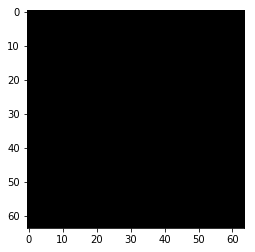

In [6]:
plt.imshow(image)

In [1]:
import minigl
import utils

In [10]:
def showImage(image):
    plt.imshow(image.transpose((1, 0, 2)))

In [9]:
for vi in v:
#     print(vi)
    image[int(vi[0]), int(vi[1])] = utils.WHITE
#     minigl.pixel(v, image, utils.WHITE)    

NameError: name 'v' is not defined

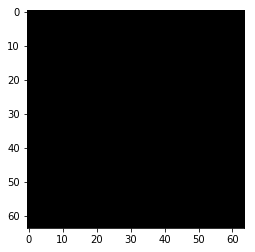

In [11]:
showImage(image)

In [11]:
def line(a, b, image, color):
    a = np.asarray(a[:2])
    b = np.asarray(b[:2])
    d = b - a
    steep = False
    if(np.abs(d[0]) < np.abs(d[1])):
        a = a[::-1]
        b = b[::-1]
        steep = True
    if a[0] > b[0]:
        a, b = b, a
    d = b - a
    e = np.abs(float(d[1])/d[0])
    error = 0
    y = a[1]
    for x in np.arange(a[0], b[0]+1):
        if steep:
            image[int(y), int(x)] = color
        else:
            image[int(x), int(y)] = color
        error += e
        if error > 0.5:
            y += 1 if b[1] > a[1] else -1
            error -= 1

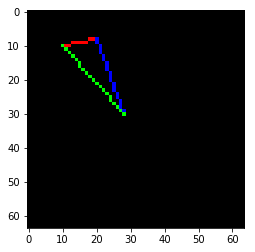

In [12]:
line(v[0], v[1], image, utils.RED)
line(v[1], v[2], image, utils.BLUE)
line(v[2], v[0], image, utils.GREEN)
showImage(image)

In [13]:
def scan_x(x1, x2, y, image, color):
    image[int(x1):int(x2+0.5), y] = color


In [14]:
def triangle_line_sweep(v, image, color):
    v = v[v[:, 1].argsort()]
    a = np.array(v[0], dtype=np.int32)
    b = np.array(v[1], dtype=np.int32)
    c = np.array(v[2], dtype=np.int32)
    total_height = max(c[1] - a[1], 1)
    seg_height = max(b[1] - a[1], 1)
    for y in range(a[1], b[1]+1):
        alpha = float(y - a[1]) / total_height
        beta = float(y - a[1]) / seg_height
        x1 = a[0] + (c[0] - a[0]) * alpha
        x2 = a[0] + (b[0] - a[0]) * beta
        if x1 > x2:
            x1, x2 = x2, x1
        scan_x(x1, x2, y, image, color)
    seg_height = max(c[1] - b[1], 1)
    for y in range(b[1], c[1]+1):
        alpha = float(y - a[1]) / total_height
        beta = float(y - b[1]) / seg_height
        x1 = a[0] + (c[0] - a[0]) * alpha
        x2 = b[0] + (c[0] - b[0]) * beta
        if x1 > x2:
            x1, x2 = x2, x1
        scan_x(x1, x2, y, image, color)

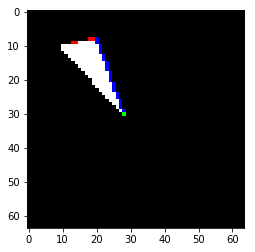

In [15]:
triangle_line_sweep(v, image, utils.WHITE)
showImage(image)

In [16]:
def barycentric(a, b, c, p):
    """
        https://en.wikipedia.org/wiki/Barycentric_coordinate_system
        ax - cx    bx - cx
        ay - cy    by - cy
    """
    v = np.array([a, b, c])
    T = (v[:-1, :2] - v[-1, :2]).T
    T_inv = np.linalg.inv(T)
    bc = np.dot(T_inv, (p[:2] - v[-1, :2]))
    bc[-1] = 1 - bc.sum()
    return bc

In [223]:
def triangle_1(vert, image, color):
    """
    Triangle rasterization using barycentric coordinates
    """
    bbmin = vert.min(axis=0)
    bbmax = vert.max(axis=0)
#     print

    # precompute matrix for finding barycentric coordinates.
    T = (vert[:-1, :2] - vert[-1, :2]).T
    T_inv = np.linalg.inv(T)

    bbmin = np.array(bbmin, dtype=np.uint64)
    bbmax = np.array(bbmax + 0.5, dtype=np.uint64) + 1
    print(bbmin, bbmax)
    
    for x in range(bbmin[0], bbmax[0]):
        for y in range(bbmin[1], bbmax[1]):
            bcd = ([x, y] - vert[-1, :2])
            bc = np.dot(T_inv,bcd)            
            bc.resize(3)
            bc[-1] = 1 - bc.sum()
#             print("x = {}, y = {}, bcd = {}".format(x, y, bc))
            if np.logical_and(bc >= 0, bc <= 1).all():
                image[int(x), int(y)] = color
#                 pixel([x, y], image, color)
                # pixel([x, y], image, bc)
    

In [28]:
def triangle_2(vert, image, color):
    """
    Triangle rasterization using barycentric coordinates
    """
    bbmin = vert.min(axis=0)
    bbmax = vert.max(axis=0)

    # precompute matrix for finding barycentric coordinates.
    T = (vert[:-1, :2] - vert[-1, :2]).T
    T_inv = np.linalg.inv(T)

    bbmin = np.array(bbmin, dtype=np.uint64)
    bbmax = np.array(bbmax + 0.5, dtype=np.uint64) + 1

    x1 = range(bbmin[0], bbmax[0])
    y1 = range(bbmin[1], bbmax[1])
    print(x1, y1)
    u, v = np.meshgrid(x1, y1, sparse=False)
#     print(x, y)
    uv = np.array([u, v])
#     print(uv.shape)    
    uv = uv.transpose(1, 2, 0)
#     print(uv.shape)
#     print(uv)
    bcd = np.array(uv - vert[-1, :2], dtype=np.float32)
#     print(bcd)
    bc = np.tensordot(T_inv, bcd, axes=(1, 2)).transpose(1, 2, 0)
    
    t = np.logical_and(np.all(np.greater_equal(bc[:, :], 0), axis=-1), np.less_equal(bc.sum(axis=-1), 1))    
    t = t.transpose(1, 0)

    bcw = np.zeros((bc.shape[0], bc.shape[1], 3))
    bcw[:, :, :2] = bc
    bcw[:, :, 2] = 1 - bc.sum(axis=-1)

    bcw = bcw.transpose(1, 0, 2)
    print("bcw.shape = ", bcw.shape)
    print("vert[:, 2] = ", vert[:, 2])
    
    bc_z = np.tensordot(vert[:, 2], bcw, axes=(0, 2))
    
    print("bc_z.shape = ", bc_z.shape)
    print("bc_z = ", bc_z)
    
    
#     print(t.shape)
    
    bb = image[bbmin[0]:bbmax[0], bbmin[1]: bbmax[1]]
    
#     print(bb.shape)

    bb[t] = color    
        

In [34]:
image.ndim

3

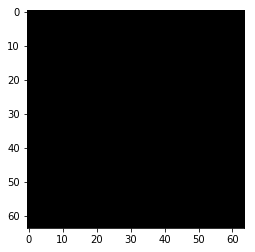

In [33]:
image = np.zeros((64, 64, 3))
# image = np.zeros((24, 24, 3))
showImage(image)

range(2, 11) range(2, 11)
bcw.shape =  (9, 9, 3)
vert[:, 2] =  [3 3 3]
bc_z.shape =  (9, 9)
bc_z =  [[ 3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]]


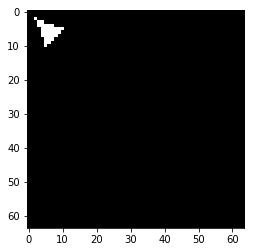

In [30]:
# a = [10, 10, 3]
# b = [50, 10, 3]
# c = [30, 45, 3]
a = [2, 2, 3]
b = [10, 5, 3]
c = [5, 10, 3]
v = np.array([a, b, c])
for vi in v:
    image[int(vi[0]), int(vi[1])] = utils.GREEN
triangle_2(v, image, utils.WHITE)
# triangle_line_sweep(v, image, utils.RED)
showImage(image)

[10 10  3] [51 46  4]


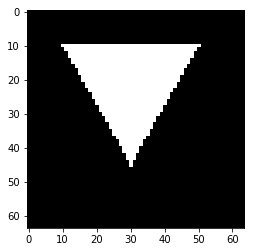

In [252]:
a = [10, 10, 3]
b = [50, 10, 3]
c = [30, 45, 3]
# a = [2, 2, 3]
# b = [10, 5, 3]
# c = [5, 10, 3]
v = np.array([a, b, c])
for vi in v:
    image[int(vi[0]), int(vi[1])] = utils.GREEN
triangle_1(v, image, utils.WHITE)
# triangle_line_sweep(v, image, utils.RED)
showImage(image)

In [ ]:
for x in range(int(bbmin[0]), int(bbmax[0]+0.5) + 1):
    for y in range(int(bbmin[1]), int(bbmax[1]+0.5) + 1):
        bc = np.dot(T_inv, ([x, y] - v[-1, :2]))
        bc.resize(3)
        bc[-1] = 1 - bc.sum()
        if np.logical_and(bc >= 0, bc <= 1).all():
            pixel([x, y], image, color)
            # pixel([x, y], image, bc)
